In [1]:
#Segmenting customers of a mall who bought subscription into different groups based on their annual income and spending score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
dataset=pd.read_csv('Mall_Customers.csv')

In [4]:
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
8             9    Male   64                  19                       3
9            10  Female   30                  19                      72
10           11    Male   67                  19                      14
11           12  Female   35                  19                      99
12           13  Female   58                  20   

In [6]:
X=dataset.iloc[:,[3,4]].values

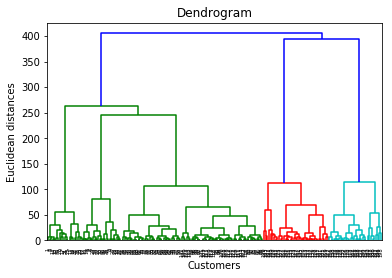

In [11]:
#using the dendogram to find the optimal no. of clusters
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X, method='ward')) #ward method minimizes the varience btw each clusters 
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.title('Dendrogram')
plt.show()

In [12]:
#Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [13]:
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


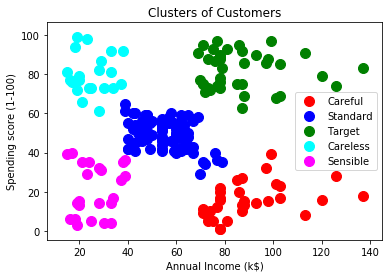

In [14]:
#visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1] , s= 100, c='red',label='Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1,1] , s= 100, c='blue',label='Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2,1] , s= 100, c='green',label='Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3,1] , s= 100, c='cyan',label='Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4,1] , s= 100, c='magenta',label='Sensible')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()